In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
cd /gdrive/MyDrive/182/procgen/christian/train_procgen_pfrl/

/gdrive/MyDrive/182/procgen/christian/train_procgen_pfrl


In [3]:
! pip install -r requirements.txt

     |████████████████████████████████| 39.9MB 1.3MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 22.2MB 1.4MB/s 
     |████████████████████████████████| 204kB 44.8MB/s 
     |████████████████████████████████| 675kB 46.0MB/s 
     |████████████████████████████████| 3.3MB 42.3MB/s 
     |████████████████████████████████| 40kB 6.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [5]:
! pip install pfrl

In [6]:
from policies import ImpalaCNN, TMPNet, TMPNet3
from procgen import ProcgenEnv
from vec_env import VecExtractDictObs
from vec_env import VecMonitor
from vec_env import VecNormalize
import torch

In [7]:
venv = ProcgenEnv(
    num_envs=1,
    env_name='fruitbot',
    num_levels=0,
    start_level=0,
    distribution_mode='easy',
    num_threads=1,
)
venv = VecExtractDictObs(venv, "rgb")
venv = VecMonitor(venv=venv, filename=None, keep_buf=100)
venv = VecNormalize(venv=venv, ob=False)

In [11]:
model = ImpalaCNN(
    obs_space=venv.observation_space,
    num_outputs=venv.action_space.n,
)

model1 = TMPNet(
    obs_space=venv.observation_space,
    num_outputs=venv.action_space.n,
    grad_on=True
)

model2 = TMPNet3(
    obs_space=venv.observation_space,
    num_outputs=venv.action_space.n,
)

100%|██████████| 20/20 [00:00<00:00, 479.40it/s]

[64, 64, 20]


In [15]:
model_path = 'log/fruitbot/nlev_500_easy/num-envs=64/trial01/model_final.pt'
state_dict = torch.load(model_path, map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

In [13]:
model_path1 = 'log/fruitbot/nlev_500_easy/bb=ppo+tmpv1grad_num-envs=32_si=50/trial01/model_final.pt'
state_dict = torch.load(model_path1, map_location=torch.device('cpu'))
model1.load_state_dict(state_dict)

<All keys matched successfully>

In [14]:
model_path2 = 'log/fruitbot/nlev_500_easy/bb=ppo+tmpv3_num-envs=32/trial01/model_final.pt'
state_dict = torch.load(model_path2, map_location=torch.device('cpu'))
model2.load_state_dict(state_dict)

<All keys matched successfully>

# Analyzing Performance

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
progress = pd.read_csv('log/fruitbot/nlev_500_easy/num-envs=64/trial01/progress.csv')
progress_tmp1 = pd.read_csv('log/fruitbot/nlev_500_easy/bb=ppo+tmpv1grad_num-envs=32_si=50/trial01/progress.csv')
progress_tmp2 = pd.read_csv('log/fruitbot/nlev_500_easy/bb=ppo+tmpv3_num-envs=32/trial01/progress.csv')

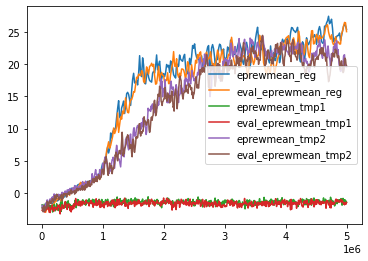

In [23]:
plt.plot(progress['total_steps'], progress['eprewmean'], label="eprewmean_reg")
plt.plot(progress['total_steps'], progress['eval_eprewmean'], label="eval_eprewmean_reg")
plt.plot(progress_tmp1['total_steps'], progress_tmp1['eprewmean'], label="eprewmean_tmp1")
plt.plot(progress_tmp1['total_steps'], progress_tmp1['eval_eprewmean'], label="eval_eprewmean_tmp1")
plt.plot(progress_tmp2['total_steps'], progress_tmp2['eprewmean'], label="eprewmean_tmp2")
plt.plot(progress_tmp2['total_steps'], progress_tmp2['eval_eprewmean'], label="eval_eprewmean_tmp2")
plt.legend()
plt.show()

In [24]:
eplen_columns = progress[['eplenmean', 'eval_eplenmean', 'total_steps']]
eplen_columns.head()

,eplenmean,eval_eplenmean,total_steps
0,86.14,78.50,16384
1,85.47,83.51,32768
2,82.20,77.65,49152
3,87.03,84.81,65536
4,86.04,85.27,81920


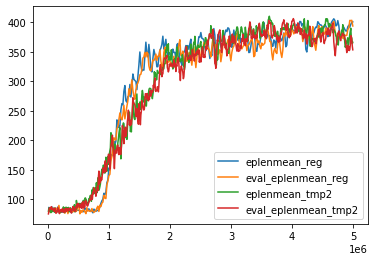

In [25]:
plt.plot(eplen_columns['total_steps'], eplen_columns['eplenmean'], label="eplenmean_reg")
plt.plot(eplen_columns['total_steps'], eplen_columns['eval_eplenmean'], label="eval_eplenmean_reg")
plt.plot(progress_tmp2['total_steps'], progress_tmp2['eplenmean'], label="eplenmean_tmp2")
plt.plot(progress_tmp2['total_steps'], progress_tmp2['eval_eplenmean'], label="eval_eplenmean_tmp2")
plt.legend()
plt.show()

# Analyzing Weights

In [26]:
model

ImpalaCNN(
  (conv_seqs): ModuleList(
    (0): ConvSequence(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (res_block0): ResidualBlock(
        (conv0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (res_block1): ResidualBlock(
        (conv0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (1): ConvSequence(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (res_block0): ResidualBlock(
        (conv0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv1): Conv2d(3

In [27]:
first_layer = model.conv_seqs[0].conv.weight.data.numpy()
first_layer.shape

(16, 3, 3, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

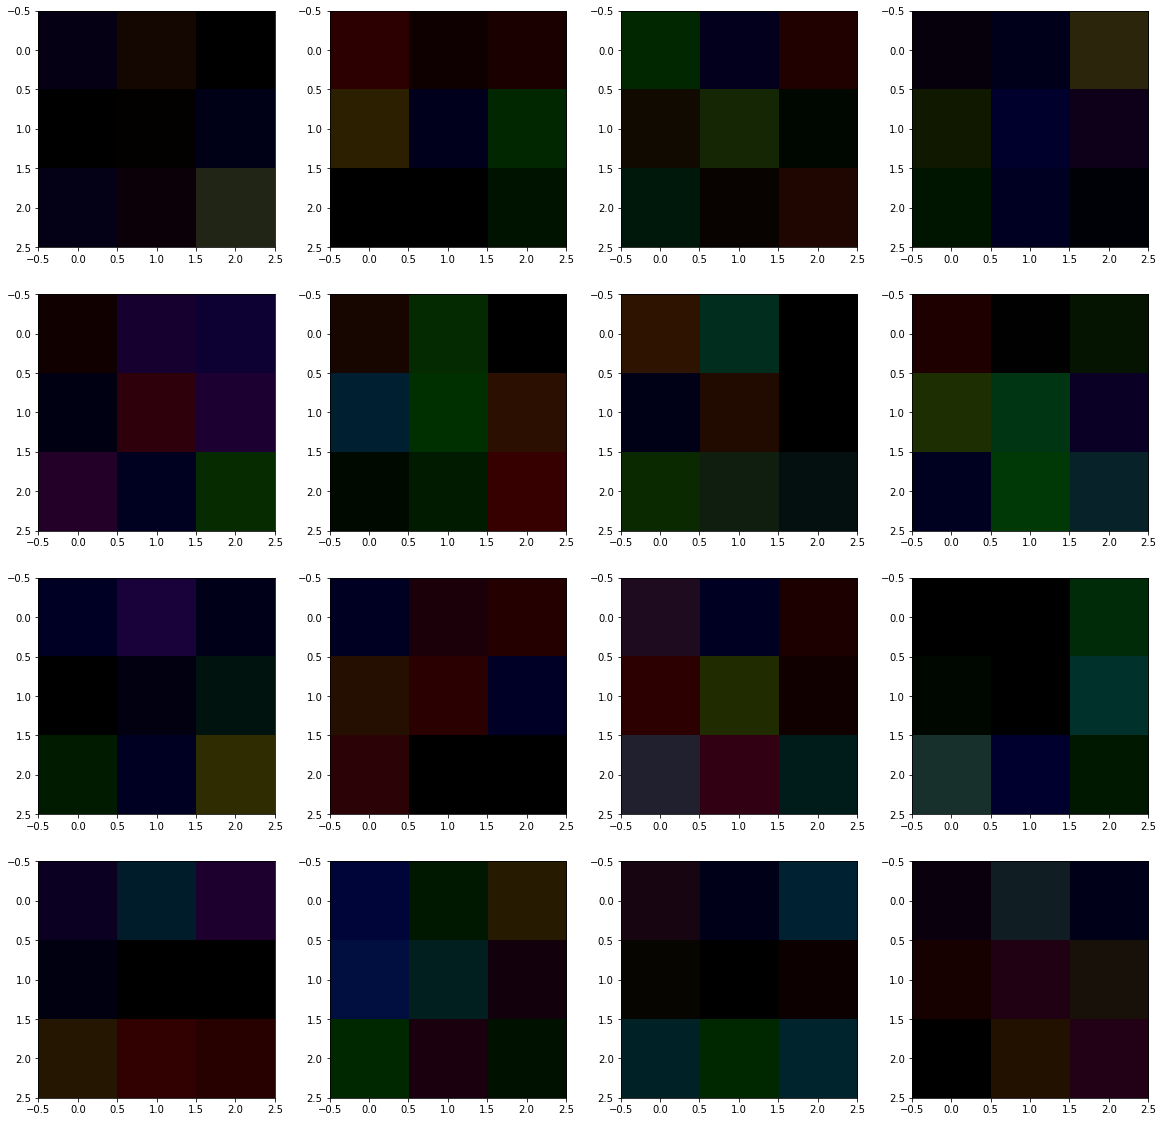

In [28]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i in range(4):
    for j in range(4):
        ax[i, j].imshow(first_layer[i * 4 + j].transpose(1, 2, 0))
print()
plt.show()

# Analyzing Weights (Model 2)

In [29]:
model2

TMPNet3(
  (proc_conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (impala): ImpalaCNN(
    (conv_seqs): ModuleList(
      (0): ConvSequence(
        (conv): Conv2d(20, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (res_block0): ResidualBlock(
          (conv0): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv1): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (res_block1): ResidualBlock(
          (conv0): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv1): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (1): ConvSequence(
        (conv): Conv2d(26, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (res_b

In [30]:
first_layer2 = model2.proc_conv.weight.data.numpy()
first_layer2.shape

(3, 3, 3, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


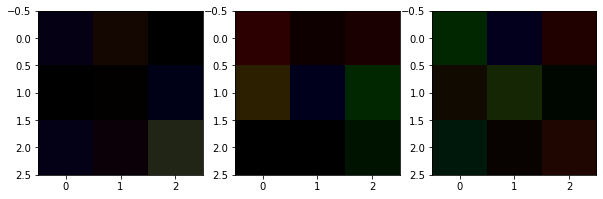

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10))

for i in range(3):
    ax[i].imshow(first_layer[i].transpose(1, 2, 0))

print()
plt.show()

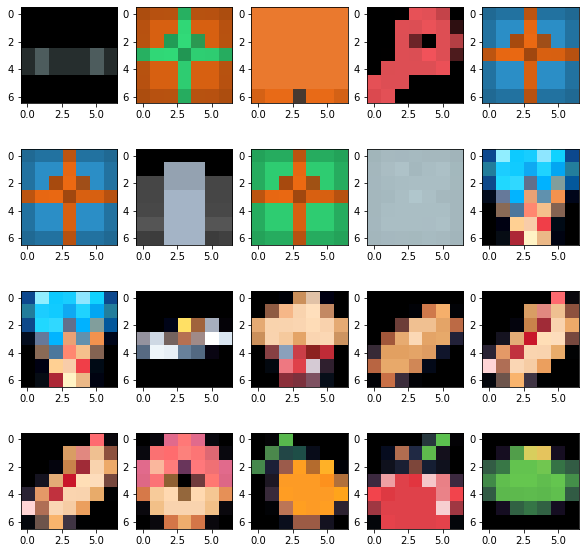

In [32]:
import numpy as np

templates = model2.templates_tensor.numpy()

fig, ax = plt.subplots(4, 5, figsize=(10, 10))

for i in range(4):
    for j in range(5):
        ax[i, j].imshow(templates[i * 4 + j].transpose(1, 2, 0).astype(np.int32))

print()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[-1.         -0.9998786   1.        ]
  [-1.          0.99955684  1.        ]
  [-1.         -0.9999479   1.        ]]]


[[[-1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [-1.          1.          1.        ]]

 [[-1.          1.          1.        ]
  [-1.          1.          1.        ]
  [ 0.99999636  1.          1.        ]]

 [[-1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [-1.          1.          1.        ]]]


[[[-1.  1.  1.]
  [-1.  1.  1.]
  [-1.  1.  1.]]

 [[-1.  1.  1.]
  [-1.  1.  1.]
  [-1.  1.  1.]]

 [[-1.  1.  1.]
  [-1.  1.  1.]
  [-1.  1.  1.]]]


[[[ 0.9998899  -1.          1.        ]
  [ 1.          1.          1.        ]
  [-1.          0.99999934  1.  

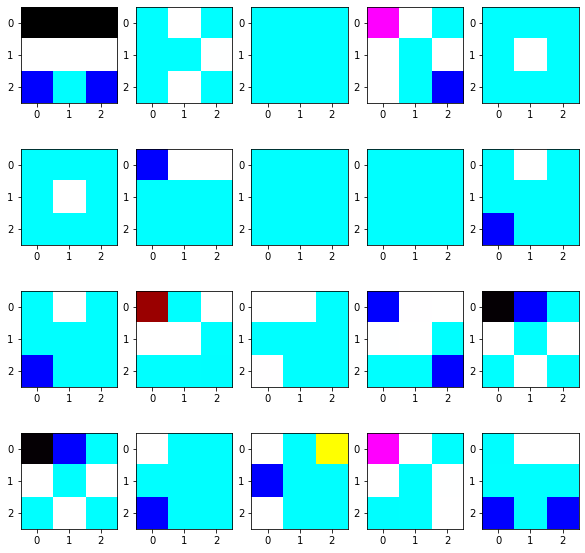

In [44]:
with torch.no_grad():
    learned_filters = torch.tanh(model2.proc_conv(model2.templates_tensor))

learned_filters = learned_filters.numpy()

fig, ax = plt.subplots(4, 5, figsize=(10, 10))

for i in range(4):
    for j in range(5):
        ax[i, j].imshow(learned_filters[i * 4 + j].transpose(1, 2, 0))
        print(learned_filters[i * 4 + j].transpose(1, 2, 0))
        print()
        print()

print()
plt.show()

# Analyzing Direct Edits on the Filter Usage

In [34]:
model1

TMPNet(
  (temp_conv): Conv2d(3, 20, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
  (impala): ImpalaCNN(
    (conv_seqs): ModuleList(
      (0): ConvSequence(
        (conv): Conv2d(20, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (res_block0): ResidualBlock(
          (conv0): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv1): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (res_block1): ResidualBlock(
          (conv0): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv1): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (1): ConvSequence(
        (conv): Conv2d(26, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False

In [37]:
first_layer = model1.temp_conv.weight.data.numpy()
first_layer.shape

(20, 3, 7, 7)

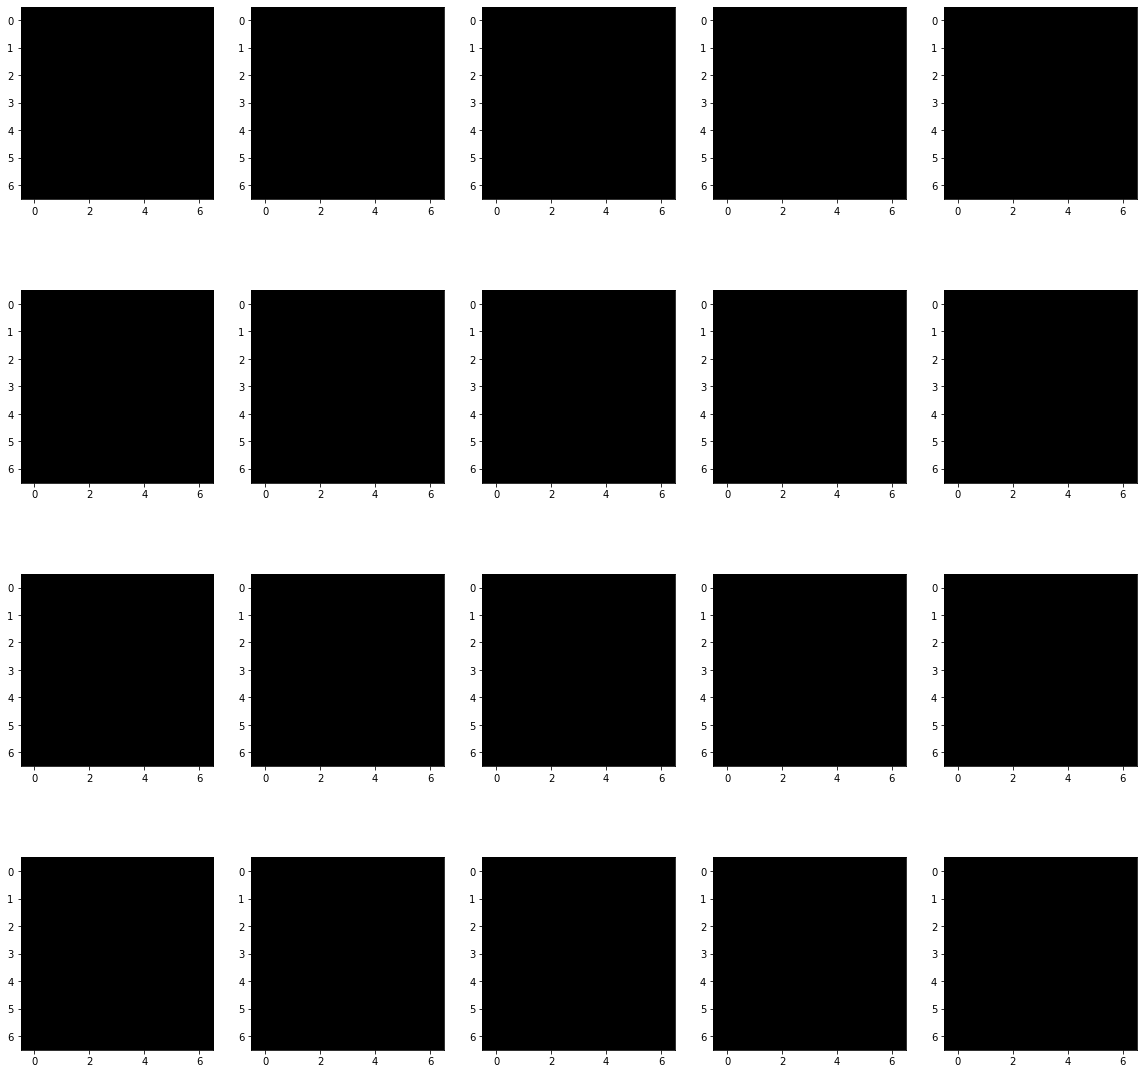

In [39]:
fig, ax = plt.subplots(4, 5, figsize=(20, 20))

for i in range(4):
    for j in range(5):
        ax[i, j].imshow(first_layer[i * 4 + j].transpose(1, 2, 0).astype(np.int32))
print()
plt.show()

In [40]:
np.mean(first_layer), np.std(first_layer)

(1.06436866e-10, 0.02086706)